# Datos

In [1]:
import pandas as pd
df = pd.read_csv("Pregunta4.csv")
df.head()

,id,casado,tiene_hijos,nro_dpntes,edad,trabaja,tipo_vivienda,hace_deporte,ofrece_seguro
0,701,no,si,1,25,si,propia,1,si con condiciones
1,305,no,no,0,29,no,familiar,0,no
2,203,no,si,1,34,si,propia,0,si
3,304,si,si,3,43,si,propia,1,si
4,102,si,no,1,51,si,propia,2,si con condiciones


In [2]:
df = pd.get_dummies(df, columns = ["tiene_hijos","casado","trabaja"], drop_first = True)

#Tipo_vivienda = 0 -> propia
#Tipo_vivienda = 1 -> familiar
#Tipo_vivienda = 2 -> arrienda
viviendas = {"propia":0,"familiar":1,"arrienda":2}
df['tipo_vivienda'] = df['tipo_vivienda'].replace(viviendas)

#ofrece_seguro = 0 -> no
#ofrece_seguro = 1 -> si con condiciones
#ofrece_seguro = 2 -> si
seguros = {"si con condiciones": 1, "no":0, "si":2}
df['ofrece_seguro'] = df['ofrece_seguro'].replace(seguros)
df

,id,nro_dpntes,edad,tipo_vivienda,hace_deporte,ofrece_seguro,tiene_hijos_si,casado_si,trabaja_si
0,701,1,25,0,1,1,1,0,1
1,305,0,29,1,0,0,0,0,0
2,203,1,34,0,0,2,1,0,1
3,304,3,43,0,1,2,1,1,1
4,102,1,51,0,2,1,0,1,1
5,406,2,52,2,0,0,1,1,1
6,507,4,43,2,3,2,1,1,1
7,108,0,33,1,0,0,0,0,0
8,409,1,27,0,2,2,1,1,1
9,180,1,28,0,3,1,1,1,1


In [3]:
df.keys()

Index(['id', 'nro_dpntes', 'edad', 'tipo_vivienda', 'hace_deporte',
       'ofrece_seguro', 'tiene_hijos_si', 'casado_si', 'trabaja_si'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['id','ofrece_seguro'],axis=1),df['ofrece_seguro'],test_size=0.2)
X_train.shape

(20, 7)

In [5]:
y_test.shape

(5,)

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors=1
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
knn.score(X_test,y_test)

0.6

# KMeans

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
X=df.drop(['id','ofrece_seguro'],axis=1)
y=df['ofrece_seguro']

In [10]:
X.head()

,nro_dpntes,edad,tipo_vivienda,hace_deporte,tiene_hijos_si,casado_si,trabaja_si
0,1,25,0,1,1,0,1
1,0,29,1,0,0,0,0
2,1,34,0,0,1,0,1
3,3,43,0,1,1,1,1
4,1,51,0,2,0,1,1


In [11]:
y.head()

0    1
1    0
2    2
3    2
4    1
Name: ofrece_seguro, dtype: int64

In [12]:
km = KMeans(n_clusters=3,max_iter=500)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
predicciones = km.predict(X)
predicciones

array([1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0])

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,predicciones)
cm

array([[4, 2, 2],
       [1, 5, 1],
       [4, 6, 0]], dtype=int64)

In [15]:
"""
import seaborn as sb
%matplotlib inline
sn.heatmap(cm,cmap='Pastel1', annot=True)
"""
from sklearn.metrics import accuracy_score
print(accuracy_score(y, predicciones))

0.36


# Arboles de clasificación

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

arbol = DecisionTreeClassifier(max_depth=3)

In [57]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
arbol.score(X_train, y_train)

0.85

In [59]:
arbol.score(X_test, y_test)

0.6

In [63]:
export_graphviz(arbol,out_file='arbol.dot',class_names=['no_ofrece_seguro','si_con_condiciones','si_ofrece_seguro'], 
                feature_names=['nro_dpntes','edad','tipo_vivienda','hace_deporte','tiene_hijos_si','casado_si','trabaja_si'],
               impurity=False, filled=True)

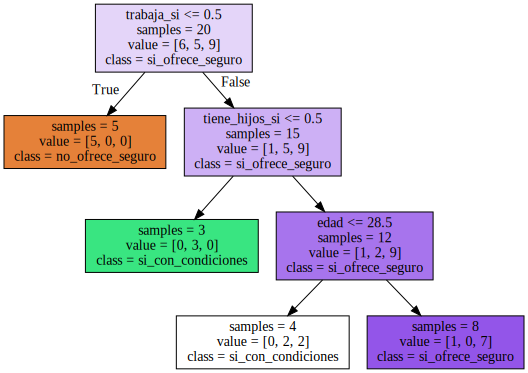

In [65]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)